In [1]:
import warnings
warnings.filterwarnings('ignore')

The following example shows how to use TransBigData to download subway lines and to build a topological network model for the subway line network

# Download subway lines

In [2]:
import transbigdata as tbd
line,stop = tbd.getbusdata('厦门',['1号线','2号线','3号线'])

Obtaining city id: 厦门success
1号线
地铁1号线(岩内-镇海路) success
地铁3号线(厦门火车站-蔡厝) success
地铁3号线(蔡厝-厦门火车站) success
地铁1号线(镇海路-岩内) success
2号线
地铁2号线(天竺山-五缘湾) success
地铁2号线(五缘湾-天竺山) success
3号线


<AxesSubplot:>

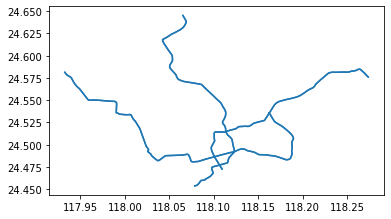

In [3]:
line.plot()

<AxesSubplot:>

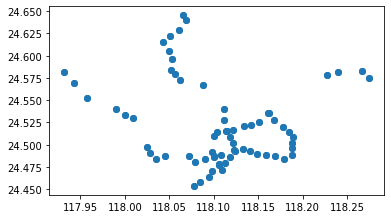

In [4]:
stop.plot()

# Splitting the metro line into sections

The `tbd.split_subwayline` method can be used to slice the metro line with metro stations to obtain metro section information (This step is useful in subway passenger flow visualization)

<AxesSubplot:>

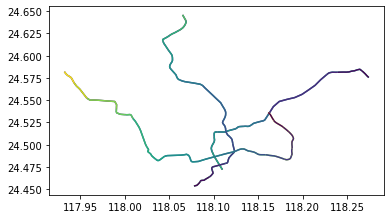

In [5]:
metroline_splited = tbd.split_subwayline(line,stop)
metroline_splited.plot(column = 'o_project')

# Modeling for subway network topology

We can also use the metro station data to build a topology model of the metro network. This step is useful for subsequent identification of metro travel paths. The graph generated relies on NetworkX.

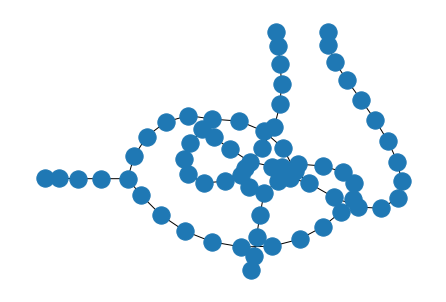

In [6]:
#Modeling for subway network topology
import networkx as nx
G = tbd.metro_network(stop)
nx.draw(G)